# Task 2 - KNN & Radius Nearest Neighbor Algorithms

### Team members:
Name| Section |
--- | --- |
[Omnia Sayed](https://github.com/omniaSayed) | 1
[Rawan Abdulhamid](https://github.com/rawan-ghanem) | 1
[Yehia Said](https://github.com/YehiaSAhmed/) | 2

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from itertools import combinations
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode


In [2]:
# Reading the csv file
df = pd.read_csv("Prostate_Cancer.csv")
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


## Data Preparation & Analysis

#### First: Data Preparation

In [3]:
def label_encoding (df):
    for i in df.select_dtypes(exclude=["number"]): # Select categorical columns
        df[i] = pd.factorize(df[i],sort=True)[0] # Label encode categorical columns
    return df

In [4]:
def detect_outliers(data, replace_with_median):
    for column in data.columns: # Iterate over each column in the DataFrame
        print(f"Checking {column} column ...")
        values = data[column]
        q1, q3 = np.percentile(values, [25, 75]) # Calculate the first and third quartiles (Q1 and Q3)
        iqr = q3 - q1 # Calculate the interquartile range (IQR)
        # Calculate the lower and upper thresholds/bounds for outliers
        lower_value = q1 - (1.5 * iqr)
        upper_value = q3 + (1.5 * iqr)
        # Select the outliers in the column based on the lower and upper thresholds
        outliers = values[(values < lower_value) | (values > upper_value)]
        # Check if there are no outliers in the column
        if (outliers.empty ):
            print("No outliers found!")
        else:
            print("Outliers are:", outliers.tolist())
            # Replace the outliers in the column with median value if replace_with_median is true
            if replace_with_median:
                median = np.median(values)
                data[column] = np.where((values < lower_value) | (values > upper_value), median, values)

    print("Finished checking")
    if replace_with_median:
        return data

In [5]:
def check_duplicate(data):
    duplicates = data[data.duplicated()] # Select the duplicate rows in the DataFrame
    if duplicates.empty: # Check if there are no duplicates
        print("No duplicates found...")
    else:
        print("Duplicates number:", len(duplicates)) # Print the number of duplicates
        return data.drop_duplicates() # Remove the duplicate rows from the DataFrame and return the result

In [6]:
# Performing Data cleaning (which remove redundant columns as id)
cleaned_df = df.drop(["id"], axis=1)
cleaned_df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


In [7]:
# turning the categorical columns into numeric columns
label_encoding(cleaned_df)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


In [8]:
# checking if the data contains duplicates or not and drop them
check_duplicate(cleaned_df)

No duplicates found...


In [9]:
# spliting the data to x and y
x = cleaned_df.drop("diagnosis_result",axis=1)
y = cleaned_df["diagnosis_result"]

In [10]:
x

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


In [11]:
# checking for outliers
detect_outliers(x,False)

Checking radius column ...
No outliers found!
Checking texture column ...
No outliers found!
Checking perimeter column ...
Outliers are: [172]
Checking area column ...
Outliers are: [1878]
Checking smoothness column ...
Outliers are: [0.143, 0.143, 0.141]
Checking compactness column ...
Outliers are: [0.278, 0.284, 0.345]
Checking symmetry column ...
Outliers are: [0.304, 0.274, 0.291]
Checking fractal_dimension column ...
Outliers are: [0.097, 0.09]
Finished checking


### Second: Data Analysis Using Exploratory Data Analysis (EDA)

In [12]:
def standardization(data_frame):
    # Computing the mean and standard deviation for the columns in the dataframe
    mean = data_frame.mean()
    std = data_frame.std()
    std_non_zero = std[std != 0]  # Filter out columns with zero standard deviation

    if std_non_zero.empty:
        print("All columns have zero standard deviation")
    else:
        data_frame.loc[:, std_non_zero.index] = (data_frame.loc[:, std_non_zero.index] - mean[std_non_zero.index]) / std[std_non_zero.index]
        return data_frame

In [13]:
def distribution_curves(data_frame):
    fig, axs = plt.subplots(len(data_frame.columns), 1, figsize=(8, 4 * len(data_frame.columns)))

    mean_values = data_frame.mean()
    percentile_q1_values = data_frame.quantile(0.25)
    percentile_q3_values = data_frame.quantile(0.75)

    for i, column in enumerate(data_frame.columns):
        sns.distplot(data_frame[column], ax=axs[i])
        axs[i].axvline(x=mean_values[column], c='red', ls='--', label='mean')
        axs[i].axvline(x=percentile_q1_values[column], c='green', ls='--', label='25th percentile:Q1')
        axs[i].axvline(x=percentile_q3_values[column], c='orange', ls='--', label='75th percentile:Q3')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

In [14]:
# checking if there is missing data
cleaned_df.isna().any().any() # the first any() will check for every column and the second will sheck for the whole data

False

In [15]:
# calculating the mean for each column
x.mean()

radius                16.85000
texture               18.23000
perimeter             96.78000
area                 702.88000
smoothness             0.10273
compactness            0.12670
symmetry               0.19317
fractal_dimension      0.06469
dtype: float64

In [16]:
# calculating the meadian for each column
x.median()

radius                17.0000
texture               17.5000
perimeter             94.0000
area                 644.0000
smoothness             0.1020
compactness            0.1185
symmetry               0.1900
fractal_dimension      0.0630
dtype: float64

In [17]:
# checking the skewness of data in each column
x.skew() # (left = -tive), (right = +tive )

radius              -0.054675
texture              0.293947
perimeter            0.445828
area                 0.836280
smoothness           0.463372
compactness          0.975305
symmetry             0.974503
fractal_dimension    1.153390
dtype: float64

C:\Users\yahya\AppData\Local\Temp\ipykernel_556\677413107.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[column], ax=axs[i])
C:\Users\yahya\AppData\Local\Temp\ipykernel_556\677413107.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[column], ax=axs[i])
C:\Users\yahya

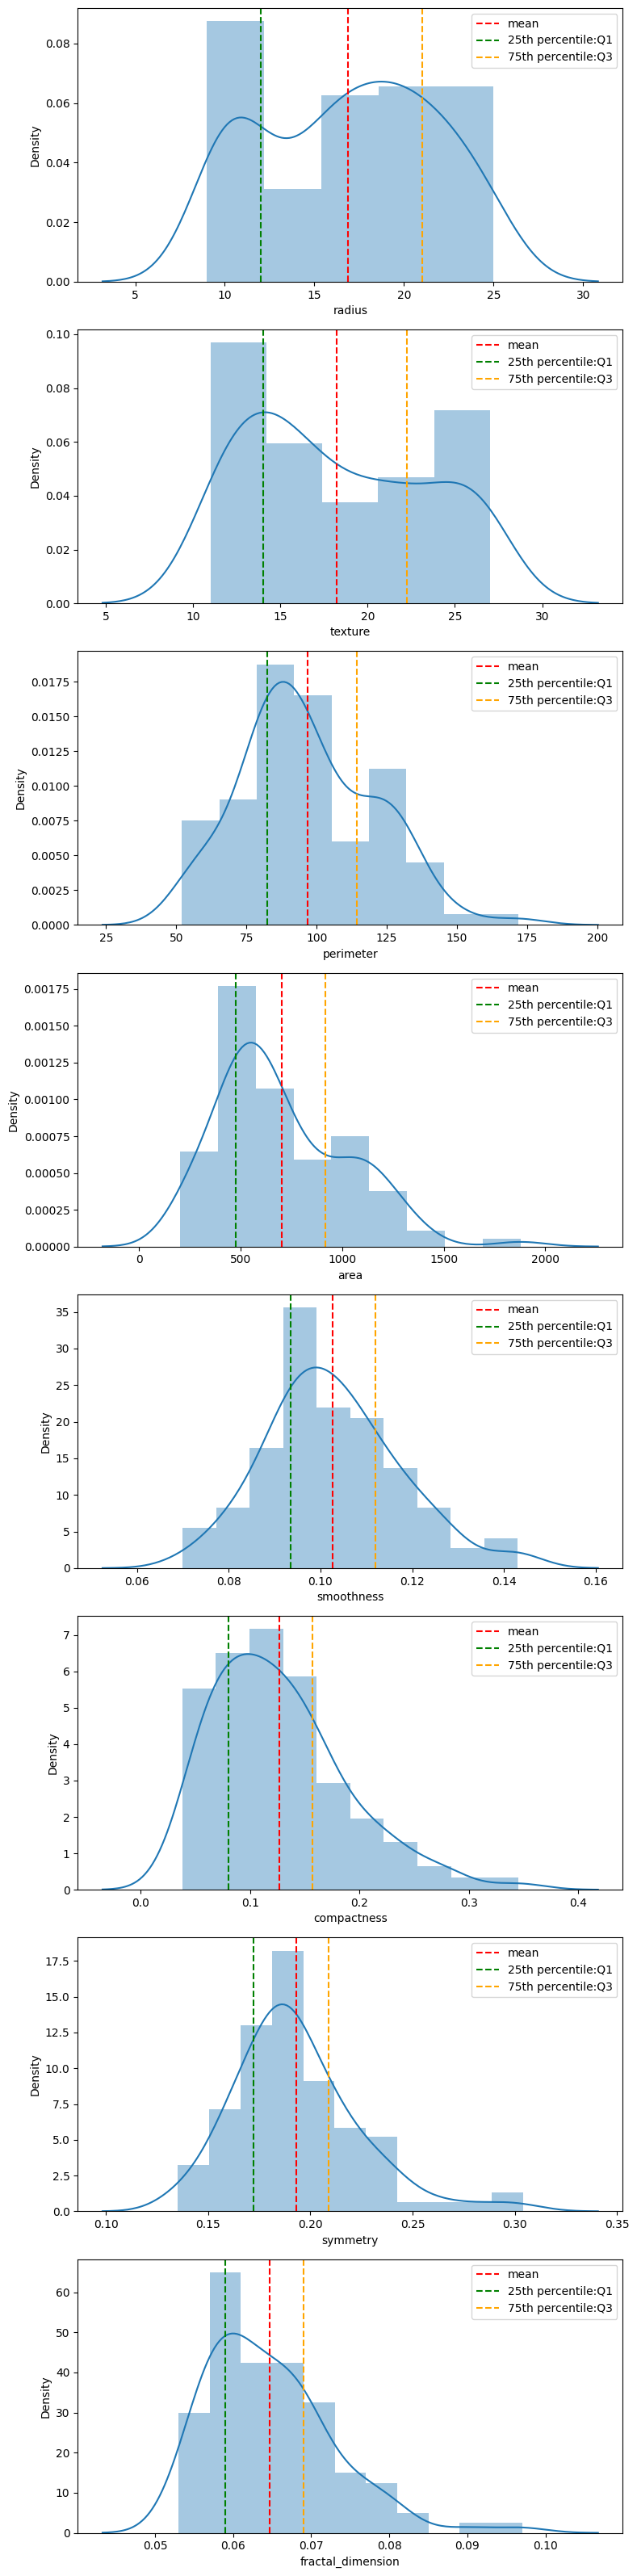

In [18]:
# Showing the distribution of the original data (except the label)
distribution_curves(cleaned_df.drop("diagnosis_result",axis=1))

In [19]:
# Checking for outliers in the data and replace them with the median
detect_outliers(x,True)

Checking radius column ...
No outliers found!
Checking texture column ...
No outliers found!
Checking perimeter column ...
Outliers are: [172]
Checking area column ...
Outliers are: [1878]
Checking smoothness column ...
Outliers are: [0.143, 0.143, 0.141]
Checking compactness column ...
Outliers are: [0.278, 0.284, 0.345]
Checking symmetry column ...
Outliers are: [0.304, 0.274, 0.291]
Checking fractal_dimension column ...
Outliers are: [0.097, 0.09]
Finished checking


,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151.0,954.0,0.102,0.1185,0.242,0.079
1,9,13,133.0,1326.0,0.102,0.0790,0.181,0.057
2,21,27,130.0,1203.0,0.125,0.1600,0.207,0.060
3,14,16,78.0,386.0,0.070,0.1185,0.260,0.063
4,9,19,135.0,1297.0,0.102,0.1330,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132.0,1264.0,0.091,0.1310,0.210,0.056
96,22,14,78.0,451.0,0.105,0.0710,0.190,0.066
97,19,27,62.0,295.0,0.102,0.0530,0.135,0.069
98,21,24,74.0,413.0,0.090,0.0750,0.162,0.066


C:\Users\yahya\AppData\Local\Temp\ipykernel_556\677413107.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[column], ax=axs[i])
C:\Users\yahya\AppData\Local\Temp\ipykernel_556\677413107.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[column], ax=axs[i])
C:\Users\yahya

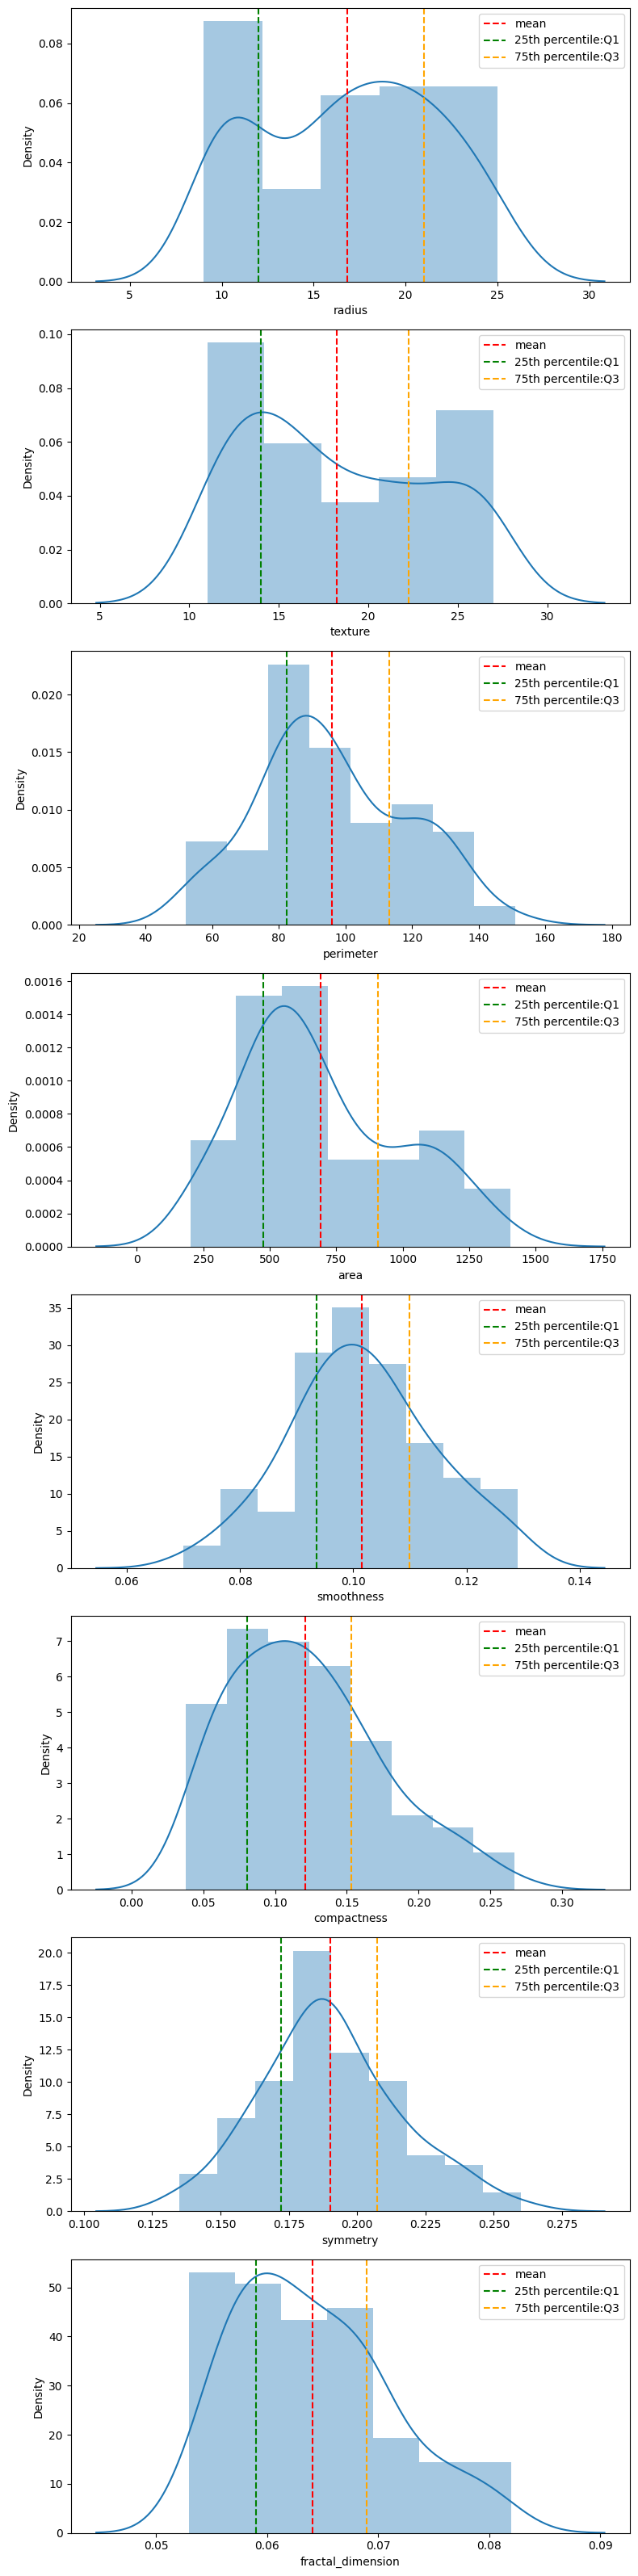

In [20]:
# Exploring the effect of changing the outliers to median in data to the distribution of the  data
distribution_curves(x)

In [21]:
x.skew() # checking the skewness after replacing outliers with median

radius              -0.054675
texture              0.293947
perimeter            0.242201
area                 0.532385
smoothness           0.068137
compactness          0.600265
symmetry             0.318331
fractal_dimension    0.586057
dtype: float64

In [22]:
# Performing standardization to the features data
standardization(x)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.260480,-1.199703,2.452649,0.887379,0.037327,-0.051226,2.029039,2.129156
1,-1.608905,-1.007134,1.649964,2.140340,0.037327,-0.804828,-0.359448,-1.010350
2,0.850568,1.688827,1.516183,1.726054,1.825907,0.740533,0.658596,-0.582236
3,-0.584125,-0.429428,-0.802685,-1.025744,-2.451132,-0.051226,2.733838,-0.154121
4,-1.608905,0.148278,1.739151,2.042663,0.037327,0.225413,-0.359448,-0.724941
...,...,...,...,...,...,...,...,...
95,1.260480,-0.429428,1.605370,1.931513,-0.818081,0.187256,0.776062,-1.153055
96,1.055524,-0.814565,-0.802685,-0.806812,0.270620,-0.957456,-0.007048,0.273993
97,0.440656,1.688827,-1.516183,-1.332247,0.037327,-1.300869,-2.160601,0.702108
98,0.850568,1.111121,-0.981060,-0.934803,-0.895845,-0.881142,-1.103402,0.273993


C:\Users\yahya\AppData\Local\Temp\ipykernel_556\677413107.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[column], ax=axs[i])
C:\Users\yahya\AppData\Local\Temp\ipykernel_556\677413107.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[column], ax=axs[i])
C:\Users\yahya

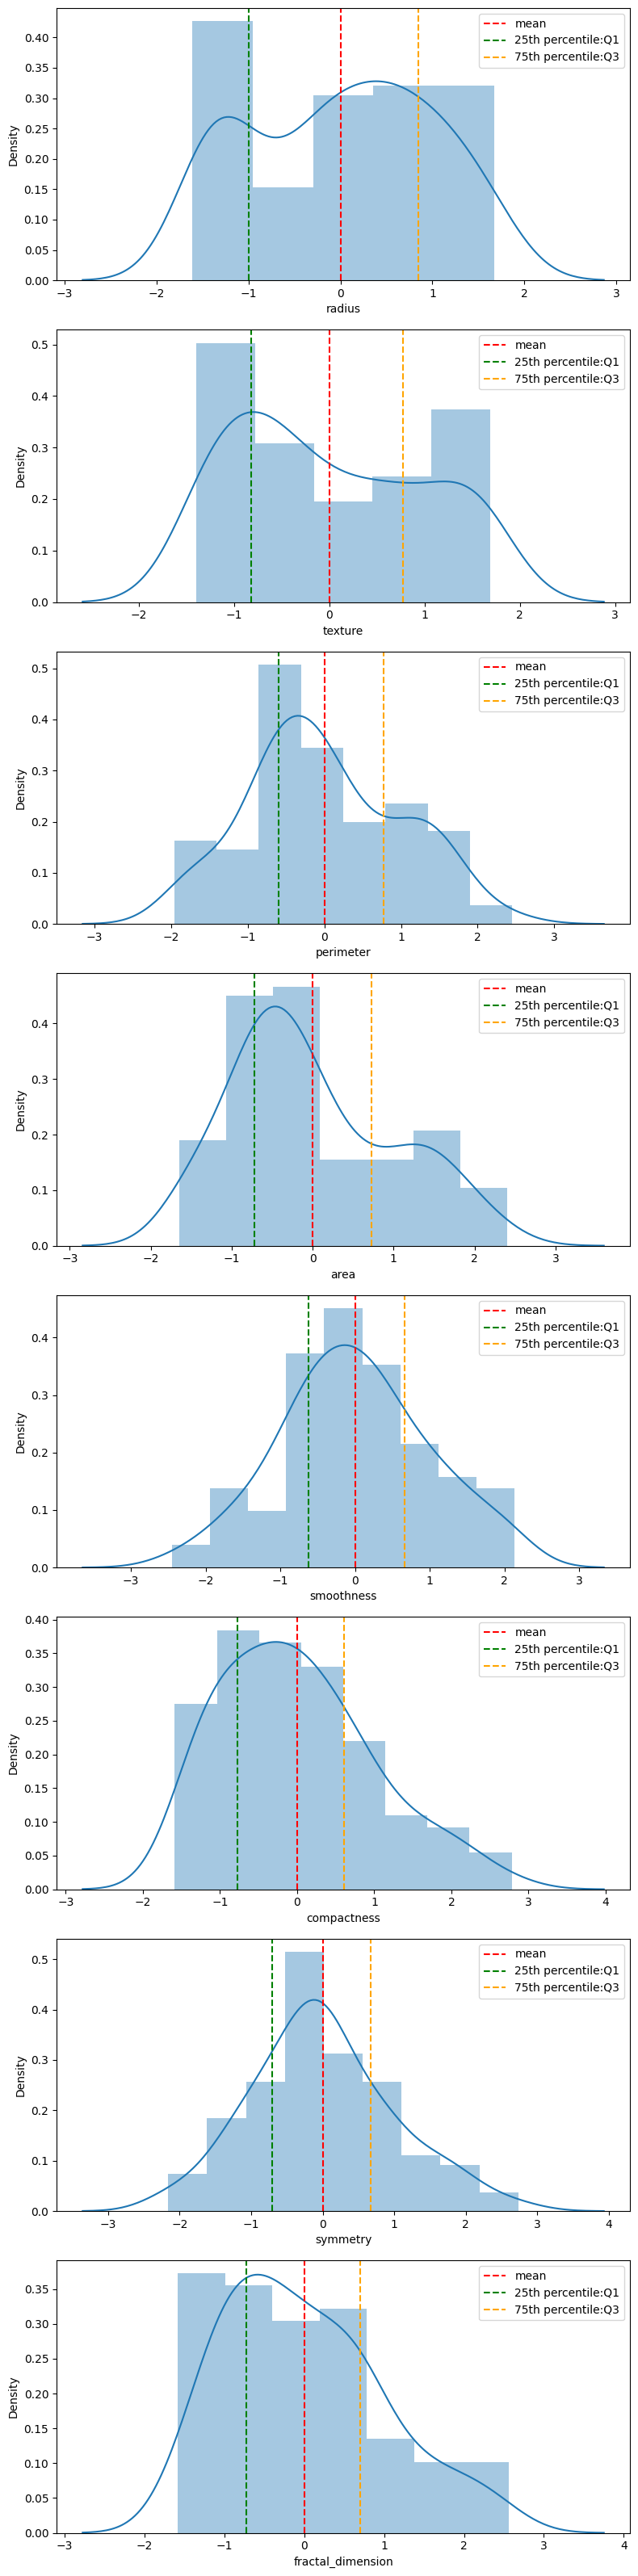

In [23]:
# Checking the distribution curves of the data after performing standardization
distribution_curves(x)

Performing bivariate analysis

In [24]:
def bivariate_analysis(x, y):
    column_names = x.columns.tolist() # selecting the column names
    column_combos = list(combinations(column_names, 2)) # getting combinations of the columns names: (column_names)C2

    for combo in column_combos:
        column1, column2 = combo
        plt.scatter(x[column1], x[column2], c=np.where(y == 1, 'red', 'blue'))
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.show()

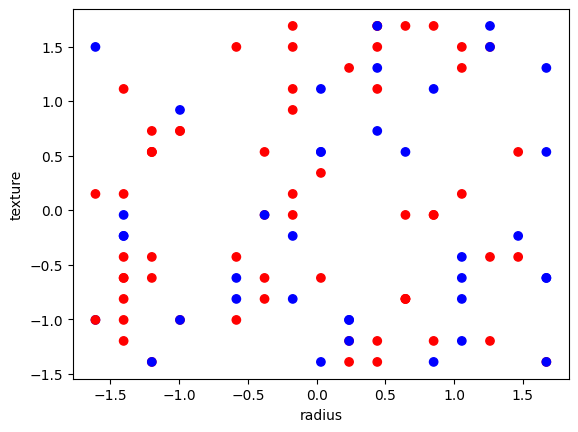

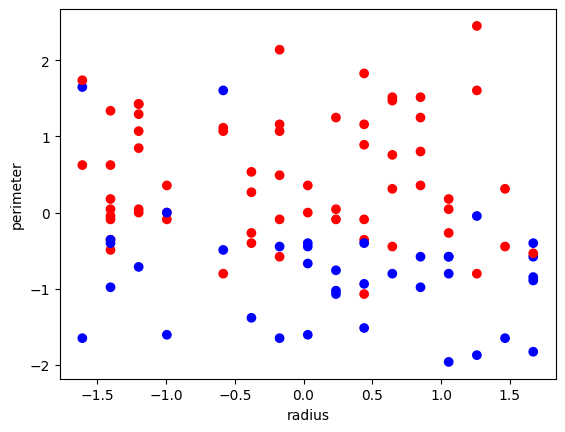

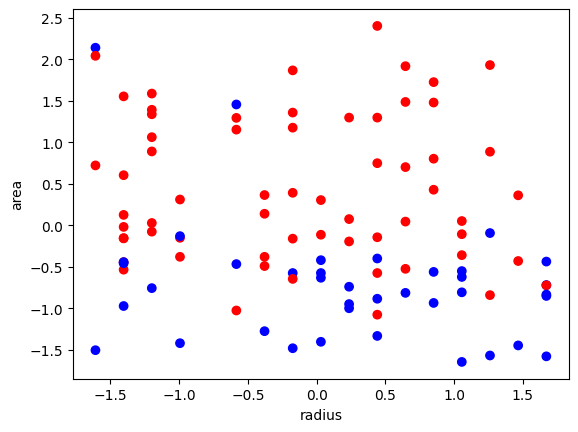

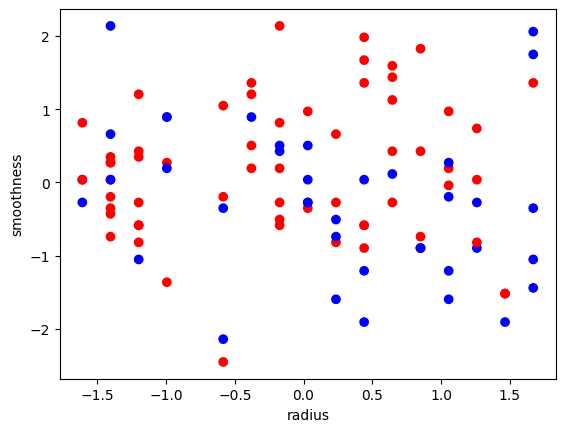

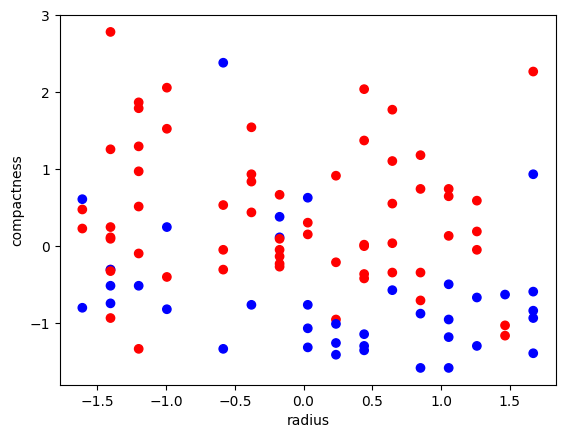

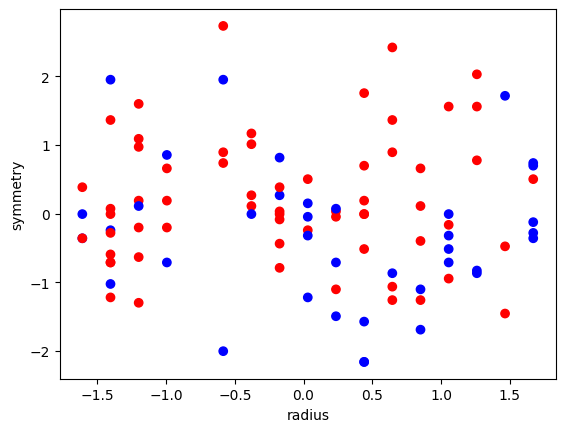

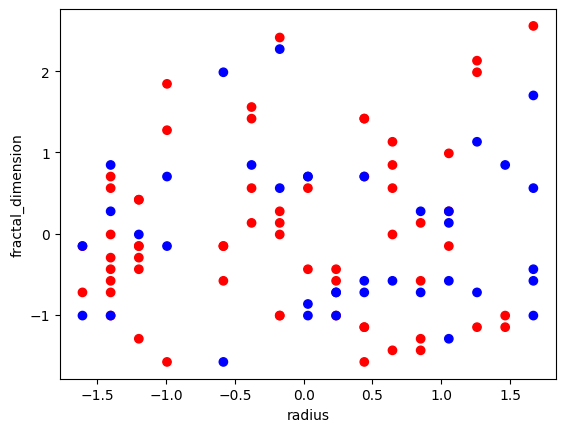

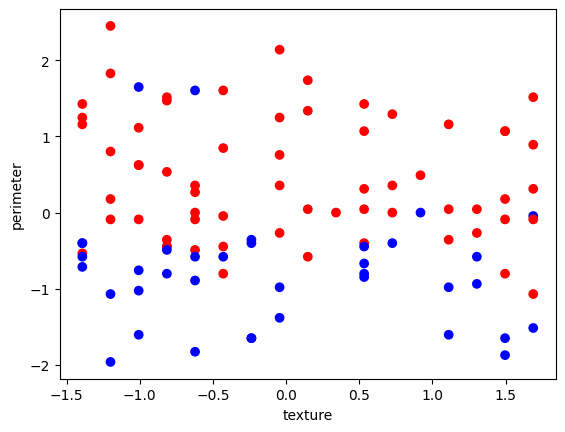

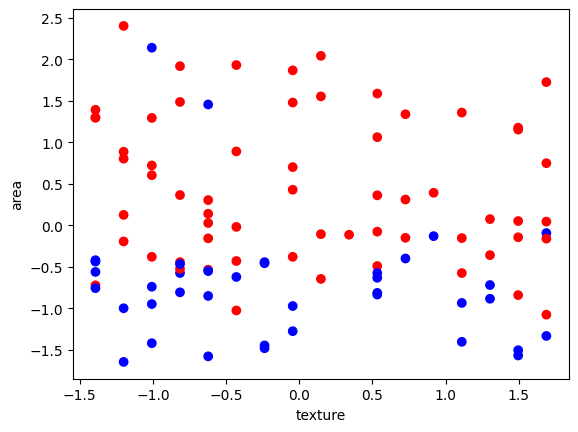

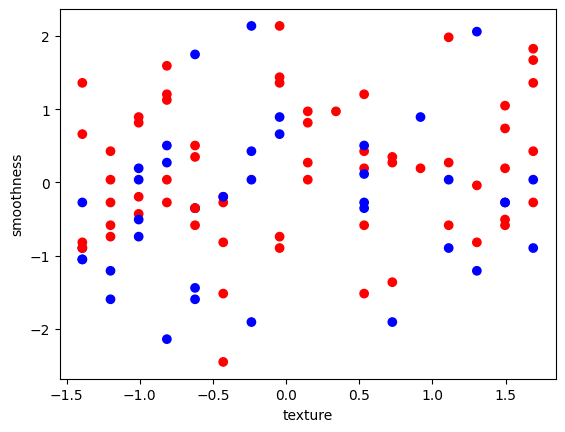

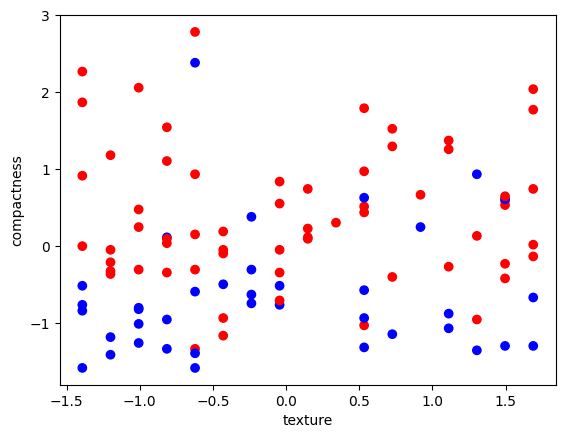

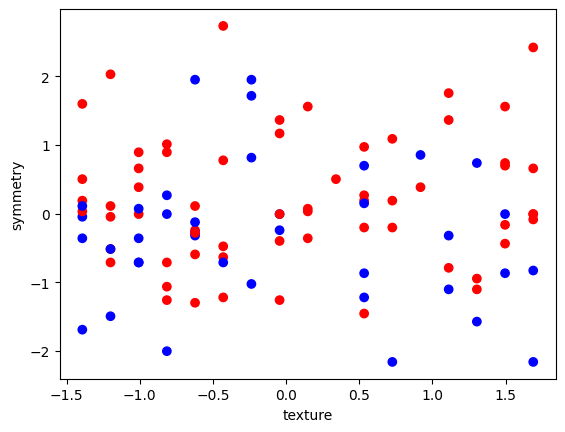

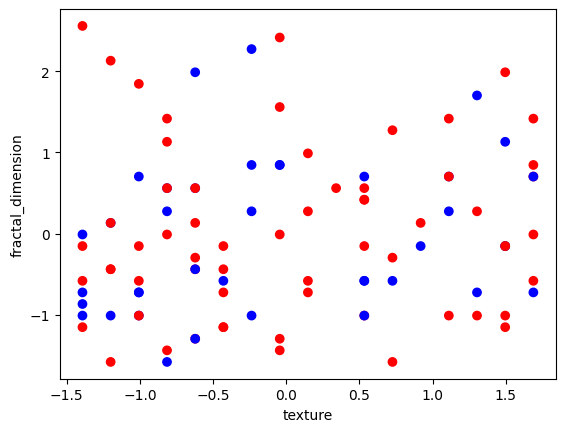

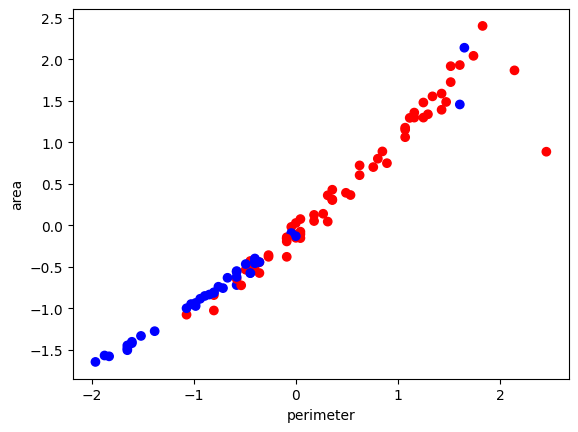

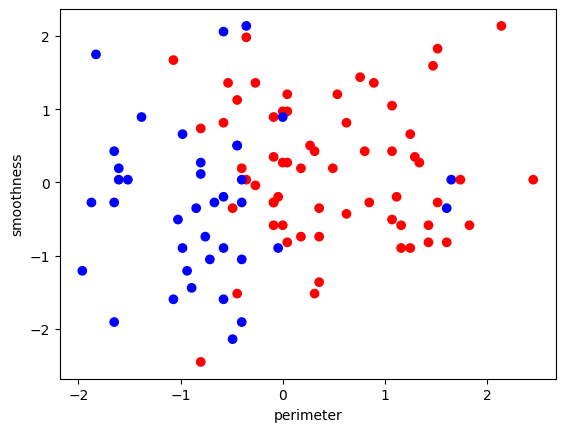

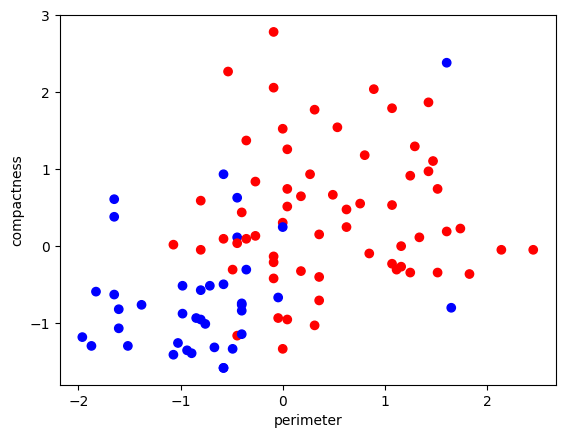

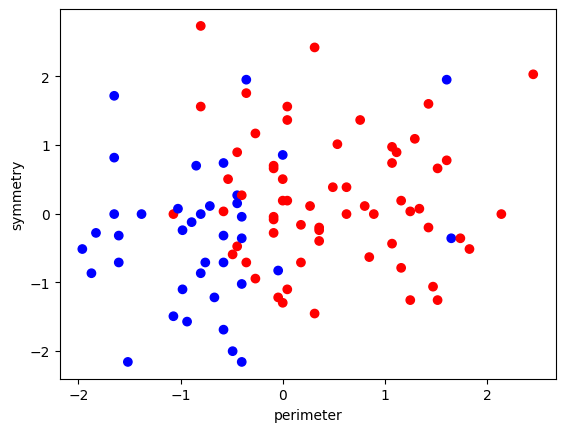

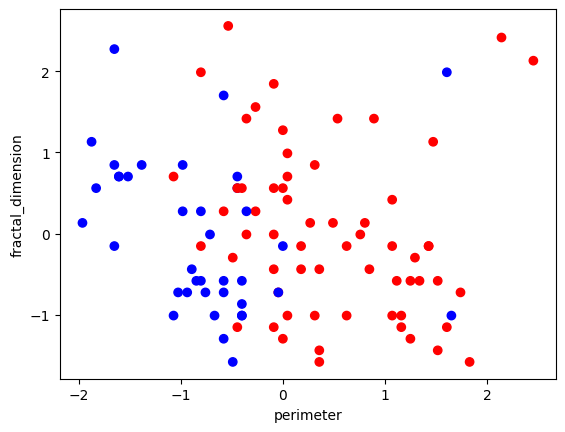

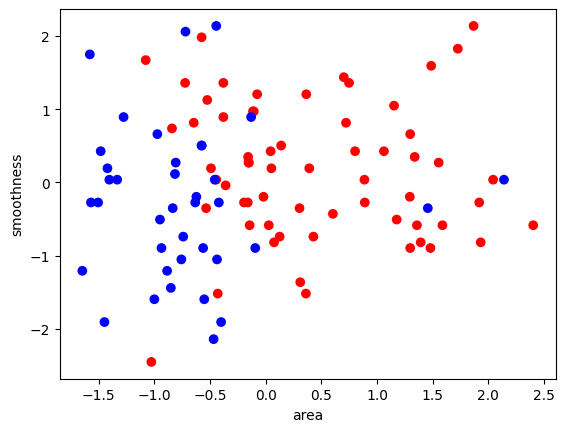

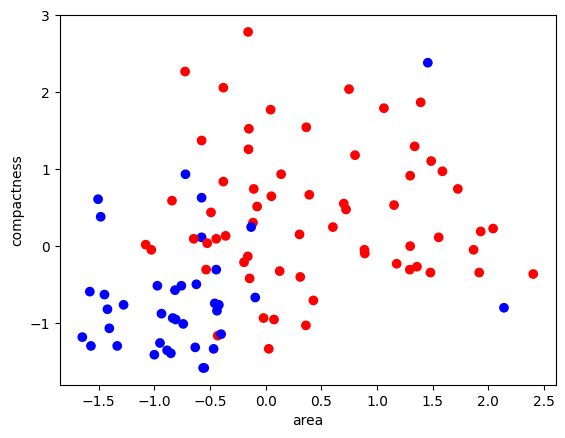

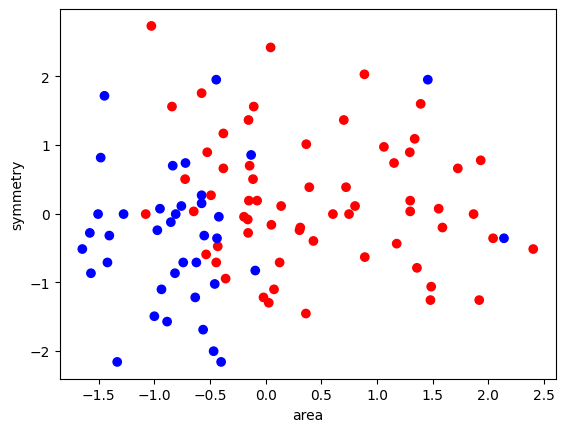

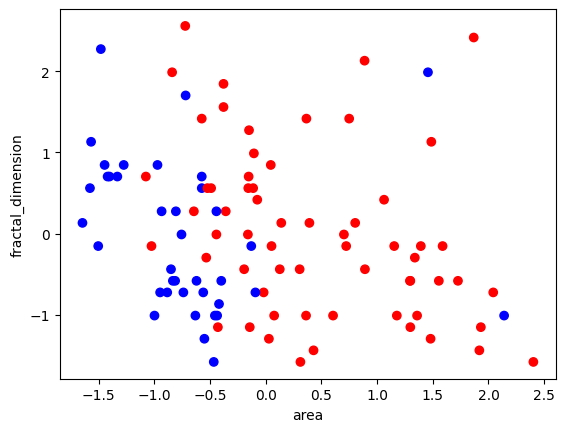

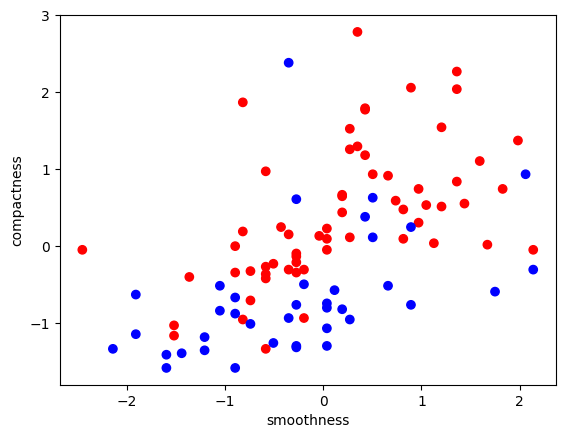

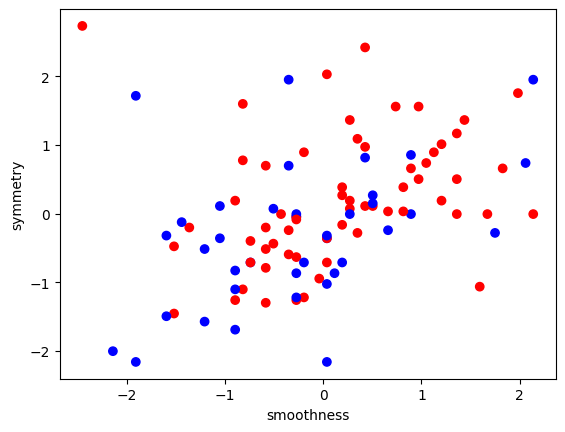

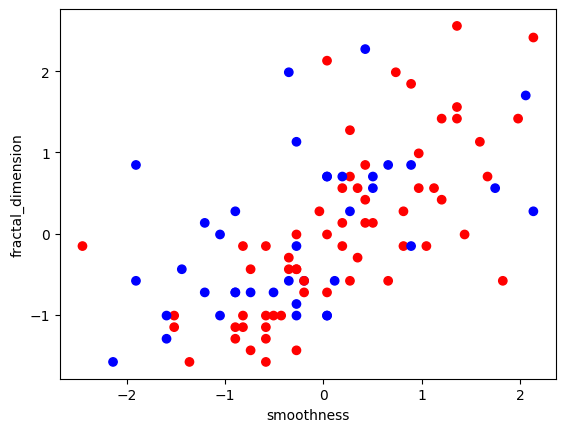

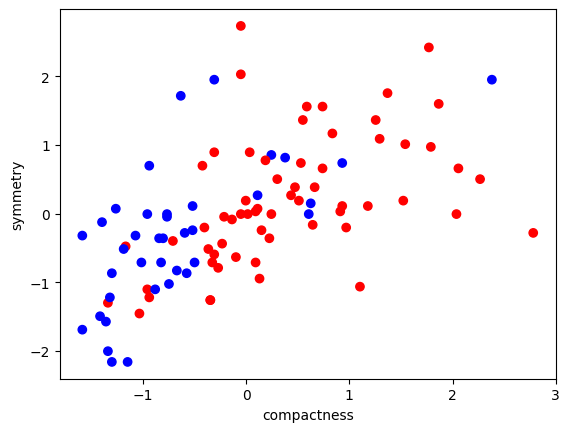

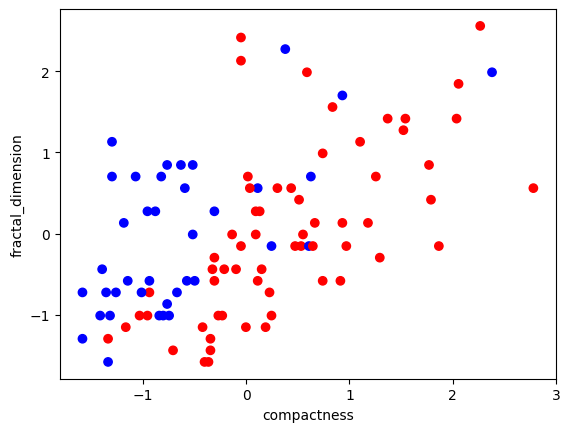

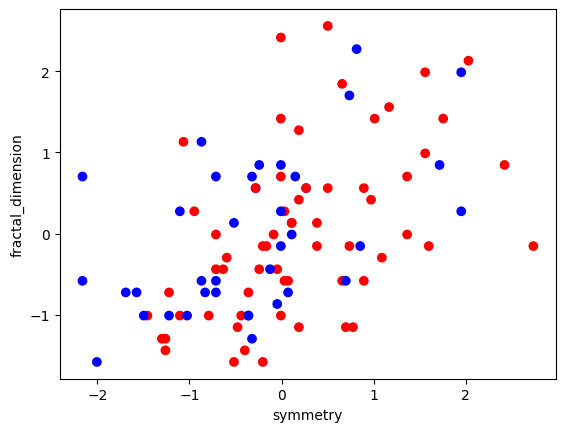

In [25]:
bivariate_analysis(x,y)

In [26]:
# spliting the data to test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [27]:
#  Creating a Radius Neighbors Classifier object with a radius of 4

radius_classifier = RadiusNeighborsClassifier(radius=4)

# Fitting the classifier with the training data
radius_classifier.fit(x_train, y_train)

# Predicting labels for the test data using the trained classifier
y_test_r = radius_classifier.predict(x_test)

# Calculating the accuracy of the Radius Neighbors Classifier
accuracy_radius = accuracy_score(y_test, y_test_r)

print("RNN Accuracy =", accuracy_radius)

RNN Accuracy = 0.9


In [28]:
class Radius_NN:

    def __init__(self, r):
        # Initializing the Radius_NN object with the given radius r
        self.r = r

    def fit(self, x_train, y_train):
        # Storing the training data
        self.x_train = np.array(x_train)  # Converting input to NumPy array
        self.y_train = np.array(y_train)
        self.num_train_samples = self.x_train.shape[0]  # Number of training samples
        self.num_features = self.x_train.shape[1]  # Number of features in the training data

    def predict(self, x_test):
        x_test = np.array(x_test)  # Converting test input to NumPy array
        num_test_samples = x_test.shape[0]  # Number of test samples
        y_test = np.zeros(num_test_samples)  # Array to store predicted labels for test samples

        for i in range(num_test_samples):
            # For each test sample, find its neighbors and predict the label
            x = x_test[i]  # Get a test sample
            neighbors = self.find_neighbors(x)  # Finding neighbors within radius r
            y_test[i] = mode(neighbors)[0]  # Predicting label based on the mode of neighbors' labels

        return y_test
    def find_neighbors(self, x):
        # Function to find neighbors within the given radius r for a given test sample x

        # Calculate Euclidean distances between x and all training samples
        distances = np.sqrt(np.sum(np.square(self.x_train - x), axis=1))

        # Select neighbors whose distances are less than or equal to the radius r
        neighbors = self.y_train[distances <= self.r]

        return neighbors


In [29]:
# Model Training
model = Radius_NN(r=4)  # Creating Radius_NN object with radius 4
model.fit(x_train, y_train)  # Fitting the model with training data

# Prediction on the test set
y_predicted_rnn = model.predict(x_test)

# Measure performance
# print(y_predicted_rnn == y_test)

correctly_classified = np.sum(y_predicted_rnn == y_test)
accuracy = correctly_classified / len(y_predicted_rnn)

print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9


In [30]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_predicted_rnn)
print(cm)

Accuracy = (cm[0,0]+ cm[1,1])/ (cm[0,0]+ cm[0,1] + cm[1,0]+ cm[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm[0,0]/(cm[0,0] + cm[1,0])
print("\nSensitivity: " + str(Sensitivity))


Confusion Matrix:
[[ 2  1]
 [ 1 16]]

Accuracy: 0.9

Sensitivity: 0.6666666666666666


# KNN (K-Nearest Neightbour)

In [31]:
class KNN:
    def __init__(self,X,y,K):
      self.X,self.y,self.K=X,y,K
      np.random.seed(48)
      self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(np.array(X),np.array(y),test_size=0.10, random_state=42,shuffle=True)
      self.y_pred=self.predict(self.X_test,self.K)
      self.accuracy,self.missed=self.evaluate()

    def distance(self,x,X):
        return np.sqrt(np.sum((x-X)**2))

    def fit(self, X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train

    def predict(self,X_test,K):
        y_pred=[]
        for x in X_test:
            dist_vals=[]
            for i in range(self.X_train.shape[0]):
                dist_vals.append((self.distance(x,self.X_train[i]),self.y_train[i]))
            dist_vals=sorted(dist_vals,key=lambda x:x[0])[:K]
            dist_vals=np.array(dist_vals)
            classes_val=np.unique(dist_vals[:,1],return_counts=True)
            index=classes_val[1].argmax()
            output=classes_val[0][index]
            y_pred.append(int(output))
        return np.array(y_pred)

    def evaluate(self):
        wrong_test=0
        wrongs=list()
        for x,y in zip(self.y_pred,self.y_test):
            if x==y:
                continue
            else:
                wrongs.append((x,y))
                wrong_test+=1
        accuracy=((self.y_pred.shape[0]-wrong_test)/self.y_pred.shape[0])*100
        print('Accuracy= {}%'.format(round(accuracy,3)))
        return accuracy,wrongs

In [32]:
# Model Training
model_knn = KNN(x, y, 5)  # Creating Radius_NN object with radius 550
model_knn.fit(x_train, y_train,)  # Fitting the model with training data

# Prediction on the test set
y_predicted_knn = model.predict(x_test)

# Measure performance
# print(y_predicted_rnn == y_test)

correctly_classified = np.sum(y_predicted_knn == y_test)
accuracy = correctly_classified / len(y_predicted_knn)

print("KNN Accuracy:", accuracy)

Accuracy= 90.0%
KNN Accuracy: 0.9


In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
predicted_labels = knn.predict(x_test)

correctly_classified = np.sum(predicted_labels == y_test)
accuracy = correctly_classified / len(predicted_labels)

print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9


In [37]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

Accuracy = (cm[0,0]+ cm[1,1])/ (cm[0,0]+ cm[0,1] + cm[1,0]+ cm[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm[0,0]/(cm[0,0] + cm[1,0])
print("\nSensitivity: " + str(Sensitivity))


Confusion Matrix:
[[ 2  1]
 [ 1 16]]

Accuracy: 0.9

Sensitivity: 0.6666666666666666
